# Extra resources
  - Online association rule mining. Christian Hidber
  - Association Rule Mining: A Survey.Qiankun Zhao Nanyang and Sourav S. Bhowmick
  - Algorithms for Association Rule Mining - A General Survey and Comparison. Jochen Hipp, Ulrich Guntz, and Gholamreza Nakhaeizadeh

# Case of study
- NYC restaurants cuisine, borough and sanitart grade
- Description:
  - You have a dataset with NYC restaurants, their boroughs and sanity grade
    1. Create a list with the transactions
    2. Enconde the transaction list into a DataFrame
    3. Perform Association Rules Learning. Play around with support and confidence.

# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

# Load data

In [5]:
dataset = pd.read_csv("./data/restaurants-challenge.csv", header = None)
dataset.head()

,0,1,2
0,BROOKLYN,Chinese,Z
1,MANHATTAN,American,C
2,BRONX,Chicken,C
3,MANHATTAN,American,A
4,MANHATTAN,American,A


# Preparing transactions

In [6]:
dataset.shape

(179731, 3)

# List

In [7]:
transactions = []
for i in range ( 0, 179731):
  transactions.append([str(dataset.values[i,j])
                      for j in range (0,3)])
transactions[:5]

[[' BROOKLYN ', ' Chinese ', ' Z'],
 [' MANHATTAN ', ' American ', ' C'],
 [' BRONX ', ' Chicken ', ' C'],
 [' MANHATTAN ', ' American ', ' A'],
 [' MANHATTAN ', ' American ', ' A']]

# Encoding transaction list

In [8]:
te = TransactionEncoder()
te_transactions = te.fit_transform(transactions)
df = pd.DataFrame(te_transactions,
                  columns = te.columns_)
df.head()

,A,Afghan,African,American,Armenian,Asian,Australian,B,BRONX,BROOKLYN,...,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,Z
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#Association Rule LEarning

# ARL

In [9]:
model = apriori(df, min_support=0.02, use_colnames=True)
results = association_rules(model,
                            metric = 'confidence',
                            min_threshold = 0.5)
results.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,( Italian ),( MANHATTAN ),0.047671,0.412644,0.029394,0.616597,1.494256,0.009723,1.531952
3,( Cafe/Coffee/Tea ),( A),0.032120,0.513078,0.022016,0.685432,1.335922,0.005536,1.547908
8,( American ),( MANHATTAN ),0.239163,0.412644,0.129866,0.543003,1.315911,0.031177,1.285251
14,"( American , B)",( MANHATTAN ),0.061208,0.412644,0.033227,0.542860,1.315563,0.007970,1.284848
12,"( American , A)",( MANHATTAN ),0.134401,0.412644,0.072642,0.540487,1.309812,0.017182,1.278213
7,( STATENISLAND ),( A),0.032326,0.513078,0.021026,0.650430,1.267703,0.004440,1.392919
0,( American ),( A),0.239163,0.513078,0.134401,0.561963,1.095279,0.011692,1.111602
11,"( American , MANHATTAN )",( A),0.129866,0.513078,0.072642,0.559359,1.090203,0.006010,1.105032
10,"( American , BROOKLYN )",( A),0.045329,0.513078,0.025238,0.556769,1.085156,0.001980,1.098575
13,"( American , QUEENS )",( A),0.040071,0.513078,0.022000,0.549014,1.070041,0.001440,1.079684


# Visualization

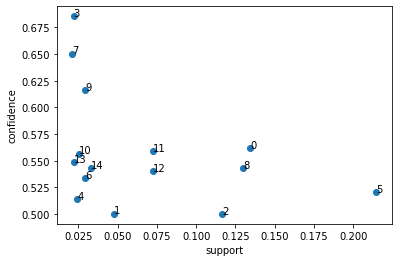

In [10]:
plt.scatter(results['support'],
            results['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
for i, label in enumerate(results.index):
  plt.annotate(label, (results['support'][i],
                       results['confidence'][i]))
plt.show()